In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import glob
%matplotlib inline

## Collect the data paths

In [82]:
data_path = "./data/"
files = glob.glob(data_path + "*.csv")
print(files)

['./data/Iron1_YS.csv', './data/Alum1_YS.csv', './data/Alum4_YS.csv', './data/Zinc3_YS.csv', './data/Brass4_YS.csv', './data/Zinc1_YS.csv', './data/Zinc5_YS.csv', './data/Brass1_YS.csv', './data/Iron2_YS.csv', './data/Alum5_YS.csv', './data/Copp1_YS.csv', './data/Zinc2_YS.csv', './data/Copp4_YS.csv', './data/Copp5_YS.csv', './data/Copp3_YS.csv', './data/Brass5_YS.csv', './data/Zinc4_YS.csv', './data/Copp2_YS.csv', './data/Brass2_YS.csv', './data/Alum2_YS.csv', './data/Iron3_YS.csv', './data/Iron4_YS.csv']


## Data Preprocessing

### Extract Terminal Velocities per run

Processing ./data/Iron1_YS.csv
-0.3946709022095117 0.008188063021237538
X2: -0.009024361017938626


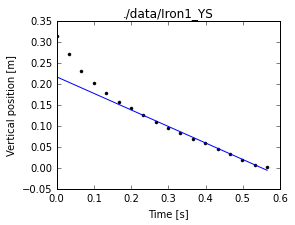


Processing ./data/Alum1_YS.csv
-0.16835243499673846 0.0008155100260078416
X2: 0.030810306630566484

Processing ./data/Alum4_YS.csv
-0.16417795746529992 0.0005264766065016899
X2: 0.004411846311663718

Processing ./data/Zinc3_YS.csv
-0.3636841718578004 0.003326460036833073
X2: 0.002027575050664255

Processing ./data/Brass4_YS.csv
-0.35490846236626095 0.005303767635244818
X2: 0.03519447118762788

Processing ./data/Zinc1_YS.csv
-0.37493119263467384 0.00567765127150394
X2: -0.023047061465428714

Processing ./data/Zinc5_YS.csv
-0.4164159807031427 0.017371619821654034
X2: 0.00613599833764302

Processing ./data/Brass1_YS.csv
-0.408080733429294 0.006256051881515612
X2: 0.004371590770587008

Processing ./data/Iron2_YS.csv
-0.35638208183723513 0.005574174170934581
X2: 0.005825044113890885


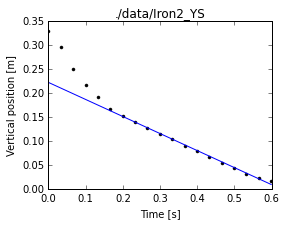


Processing ./data/Alum5_YS.csv
-0.11245883579866836 0.0007934307588731234
X2: 0.09811169711709669

Processing ./data/Copp1_YS.csv
-0.4214445196262525 0.0050028581073154705
X2: -0.002454803138777031

Processing ./data/Zinc2_YS.csv
-0.3866236444637727 0.015492035681248595
X2: 0.015888086418650308

Processing ./data/Copp4_YS.csv
-0.45072854851613176 0.015598809539187238
X2: 0.002487088201931664

Processing ./data/Copp5_YS.csv
-0.44063569529387353 0.002820830021127052
X2: 0.00026093969717061233

Processing ./data/Copp3_YS.csv
-0.4457103113823369 0.005752659634882525
X2: 0.006829473898914171

Processing ./data/Brass5_YS.csv
-0.42917460031860405 0.007882614954582258
X2: 0.008983524785839763

Processing ./data/Zinc4_YS.csv
-0.3500447271679866 0.004075073563185159
X2: 0.0035804898617584585

Processing ./data/Copp2_YS.csv
-0.4588123505139047 0.004739299281695203
X2: 0.0016629742527337905

Processing ./data/Brass2_YS.csv
-0.4315541418999836 0.008232247545995112
X2: -0.009438732774830493

Proces

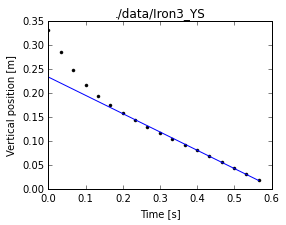


Processing ./data/Iron4_YS.csv
-0.40789013303215543 0.007889130430029086
X2: 0.0011796868452597063


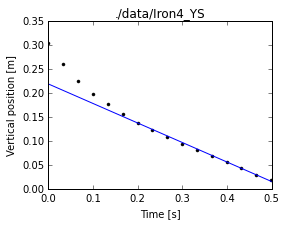


Processed 22 files.


In [83]:
t_min = 0.15
v_t_dict = {}

for i, path in enumerate(files):
    print("====================================================================")
    print("Processing", path)
    trial = path.replace(".csv","")[:-4].replace(data_path, "") #Store trial names for data compilation
    data = np.genfromtxt(path, skip_header=2, delimiter=",")

    # Extract relevant data
    linear_portion = data[data[:,0]>t_min]

    # Calculate terminal velocity in m/s
    (v_t, b), pcov = np.polyfit(linear_portion[:, 0], linear_portion[:, 1]/1000, deg=1, cov=True)
    err = np.sqrt(np.diag(pcov))[0] # Error on the slope
    print(v_t, err)
    chi2 = np.sum((linear_portion[:,1]/1000-(v_t*linear_portion[:,0] + b))**2/(v_t*linear_portion[:,0] + b))
    print("X2:", chi2)
    
    v_t = -abs(v_t) #make sure they're all negative
  
    if "Iron" in path:
        plt.figure(figsize=(4, 3))
        plt.title(path.replace(".csv",""))
        plt.xlabel("Time [s]")
        plt.ylabel("Vertical position [m]")
        plt.plot(data[:,0], data[:,1]/1000, "k.")
        plt.plot(data[:,0], data[:,0]*v_t + b, "b")
        plt.show()

    # Storing terminal velocity and its uncertainty
    if trial not in v_t_dict.keys(): 
        v_t_dict[trial] = [[v_t, err]]
    else: v_t_dict[trial].append([v_t, err])
    print()

print("Processed", len(files), "files.")

In [84]:
# Figure out the maximal number of trials per material
x = 0
for key in sorted(v_t_dict):
    # print("%s: %s" % (key, v_t_dict[key]))
    y = len(v_t_dict[key])
    if y > x: x = y

### Store terminal velocities per material

In [85]:
v_t_trials = np.full(shape=(y, 10), fill_value=np.nan)
for i, key in enumerate(sorted(v_t_dict)):
    v_t_trials[0:len(v_t_dict[key]), 2*i:2*i+2] = v_t_dict[key]

print(v_t_trials.shape) # Sanity check: should be n trials x 10 (5 v_t's + 5 errors)

# Array of terminal velocities with uncertainties (alphabetical order)
v_t = np.nanmean(v_t_trials, axis=0)
v_t = v_t.reshape(5,2)
print(v_t)

(5, 10)
[[-0.13472637  0.00060656]
 [-0.40592948  0.00691867]
 [-0.44346629  0.00678289]
 [-0.38539877  0.00652075]
 [-0.37833994  0.00918857]]


### Store densities and velocities together

In [88]:
# Velocity and density data
processed_data = np.full(shape=(5, 4), fill_value=np.nan)
processed_data[:, 2:] = v_t
processed_data[:, 0] = [2870, 8590, 9230, 7960, 7320]

# Uncertainties on density
percent_uncert = np.array([53.611111111111114, 46.2037037037037, 45.94827586206897, 46.5, 46.84782608695652])
processed_data[:, 1] = processed_data[:, 0]*(percent_uncert/100)
print(data)

np.savetxt("data.csv", data, delimiter=",")

[[ 2.87000000e+03  1.53863889e+03 -1.34726372e-01  6.06564947e-04]
 [ 8.59000000e+03  3.96889815e+03 -4.05929485e-01  6.91867050e-03]
 [ 9.23000000e+03  4.24102586e+03 -4.43466285e-01  6.78289132e-03]
 [ 7.96000000e+03  3.70140000e+03 -3.85398772e-01  6.52074653e-03]
 [ 7.32000000e+03  3.42926087e+03 -3.78339943e-01  9.18856807e-03]]


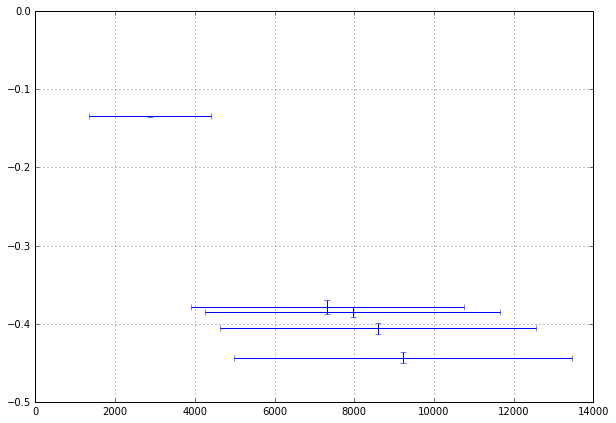

In [103]:
# Visual inspection before fitting
plt.figure(figsize=(10,7))
plt.errorbar(x=processed_data[:,0], xerr=processed_data[:,1], 
             y=processed_data[:,2], yerr=processed_data[:,3], 
             fmt="none")
plt.ylim(-0.5, 0)
plt.grid()
plt.show()

## Fitting: Spinmob

In [91]:
import spinmob as s

# Load the data as a databox
fitting_data = s.data.load("data.csv") # WIP

WIP: Sent an email to Sankley today (31/03/2021) to check how to handle systematic error of the data. To do next: Fit the data with error propagation.

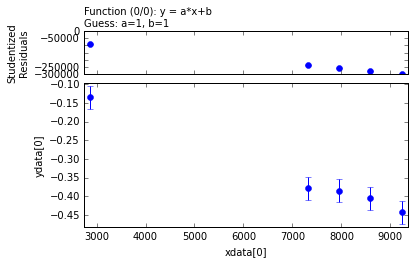

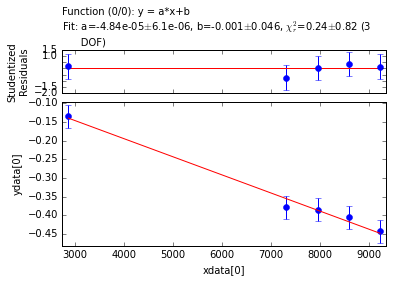

In [102]:
# Make a fitter and fit it to the data (WIP)
my_fitter = s.data.fitter()
my_fitter.set_functions('a*x+b', 'a,b')
my_fitter.set_data(processed_data[:,0], processed_data[:,2])
my_fitter.fit()
my_fitter.results